In [1]:
import pandas as pd
import numpy as np
import correlation_between_genres
import matplotlib.pyplot as plt

df = pd.DataFrame(pd.read_csv('../netflix_titles.csv'))
dfMovies = df[df['type'] == 'Movie']
dfSeries = df[df['type'] == 'TV Show']

In [2]:

missingMovieDates = len(dfMovies[dfMovies['date_added'].isnull()])
missingSeriesDates = len(dfSeries[dfSeries['date_added'].isnull()])
print('Total number of movies having a unknown date they were added: ', missingMovieDates)
print('Total number of series having a unknown date they were added: ', missingSeriesDates)

Total number of movies having a unknown date they were added:  1
Total number of series having a unknown date they were added:  10


In [3]:
def genresAddedPerYear(df: pd.DataFrame) -> pd.DataFrame:
    # Gets the dates from the dateFrame and converts the format to datetime
    dates = pd.to_datetime(df['date_added'])
    # Removes day and month, as we are only interested in the year
    dates = dates.dt.year


    # Splits the listed_in column into individual genre columns
    genres = correlation_between_genres.genresOfMoviesSeries(df)

    # Puts dates and genres into one table
    genreAdded = correlation_between_genres.genresOfMoviesSeries(df)
    genreAdded.insert(0, 'date_added', dates)

    # Change cells with no value to None
    genreAdded = genreAdded.where(genreAdded.notnull(), None)

    # Name of every genre
    uniqueGenres = correlation_between_genres.totalOccurenceOfGenres(genres).keys().tolist()
    uniqueYears = genreAdded['date_added'].unique()
    # Flip the list to get the columns in the next step in ascending order from left to right
    uniqueYears = np.flip(uniqueYears)
    # Removing nan value
    uniqueYears = uniqueYears[1:]
    uniqueYears = np.sort(uniqueYears)

    genresAddedPerYear = pd.DataFrame(0, index = uniqueGenres, columns=uniqueYears)


    for i, movie in genreAdded.iterrows():
        yearAdded = movie['date_added']
        genresOfMovie = movie[1:4]

        for genre in genresOfMovie:
            if (yearAdded == None or genre == None):
                continue
            genresAddedPerYear[yearAdded][genre] += 1
    
    return genresAddedPerYear

In [4]:
# dataFrame showing how many movies/series with a given genre was added per year.
# Mind that a movie/series may have multiple genres and the sum of each column isn't the same as at number of  
# movies/series added per year.
genresAddedPerYearSeries = genresAddedPerYear(dfSeries)
genresAddedPerYearMovies = genresAddedPerYear(dfMovies)

In [5]:
# Removing the data in the year 2020 as the year is not over yet and therefore is not representable
genresAddedPerYearSeries = genresAddedPerYearSeries.drop(2020, axis = 'columns')
genresAddedPerYearMovies = genresAddedPerYearMovies.drop(2020, axis = 'columns')

In [6]:
display(genresAddedPerYearSeries)
display(genresAddedPerYearMovies)

,2008.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
International TV Shows,0,0,1,0,5,93,223,246,413
TV Dramas,0,0,4,3,9,48,146,134,241
TV Comedies,0,2,1,3,11,47,70,121,166
Crime TV Shows,0,0,2,1,1,29,72,106,145
Kids' TV,0,3,1,3,12,46,53,82,119
Docuseries,0,0,1,0,6,29,56,77,104
Romantic TV Shows,0,0,0,0,1,47,65,54,108
British TV Shows,0,0,0,0,8,19,51,54,75
Reality TV,0,0,0,0,0,5,16,44,83
Korean TV Shows,0,0,0,0,0,10,39,16,62


,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
International Movies,0,1,0,1,0,0,2,10,87,455,702,651
Dramas,1,1,0,13,0,0,0,12,69,328,547,609
Comedies,0,0,0,0,3,1,2,12,51,208,310,468
Documentaries,0,0,0,0,1,1,8,13,70,210,172,191
Action & Adventure,0,0,0,0,0,0,1,2,20,116,185,239
Independent Movies,1,0,0,0,0,0,0,7,35,126,160,210
Thrillers,1,0,0,1,0,0,0,2,16,75,120,158
Children & Family Movies,0,0,0,1,2,2,4,11,21,76,86,151
Romantic Movies,0,0,0,0,0,0,0,1,8,71,118,165
Stand-Up Comedy,0,0,0,0,0,4,4,13,39,63,89,66


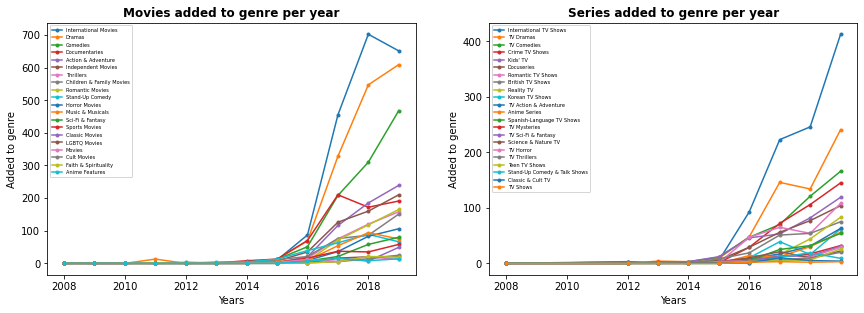

In [7]:
movieGenres = genresAddedPerYearMovies.index
seriesGenres = genresAddedPerYearSeries.index

fig, (ax1, ax2) = plt.subplots(1, 2, )
fig.subplots_adjust(right = 2, top = 1)

ax1.set_xlabel('Years')
ax1.set_ylabel('Added to genre')
ax1.set_title('Movies added to genre per year', fontweight = 'bold')

ax2.set_xlabel('Years')
ax2.set_ylabel('Added to genre')
ax2.set_title('Series added to genre per year', fontweight = 'bold')



for genre in movieGenres:
    ax1.plot(genresAddedPerYearMovies.loc[genre], marker = '.')

for genre in seriesGenres:
    ax2.plot(genresAddedPerYearSeries.loc[genre], marker = '.')

ax1.legend(movieGenres, loc = 2, fontsize = 5)
ax2.legend(seriesGenres, loc = 2, fontsize = 5)
plt.show()

We can tell from these two plots that the amount of new content added has been increasing every year, and the growth started to spike around 2015. We can also tell that there hasn't been added any new series in the years between 2008 and 2012. There are in total 11 movies/series missing a added date where 10 of them are series. Some of these, or all, might have been added in the years between 2008 and 2012, but we don't really know.